In [ ]:
#Primary analysis of this model

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score


%matplotlib inline
sns.set()

df = pd.read_csv(r'C:/Users/Ashwini Yadav/credit_card.csv')
df.info()


In [ ]:
df.describe()

In [ ]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.countplot(x='BALANCE_FREQUENCY', data=df);
plt.show()

In [ ]:
#elbow method

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

df = pd.read_csv(r'C:/Users/Ashwini Yadav/credit_card.csv')
X = df.iloc[:, [3, 4]].values

from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
                      


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss)
plt.xlabel('Balance')
plt.ylabel('Purchase') 
plt.show()

C:\Users\Ashwini Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

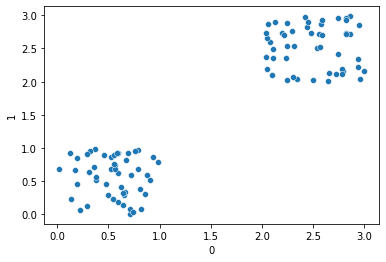

In [6]:
#silhouette score method

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

sns.scatterplot(Z[0],Z[1])


Silhouette Score(n=2): 0.8078246784166891


C:\Users\Ashwini Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

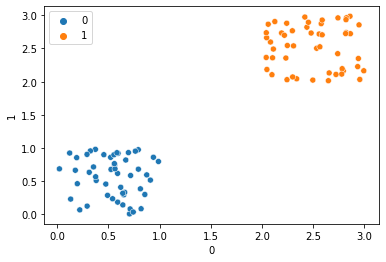

In [7]:
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

sns.scatterplot(Z[0],Z[1],hue=label)


Silhouette Score(n=3): 0.6090237705777924


C:\Users\Ashwini Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

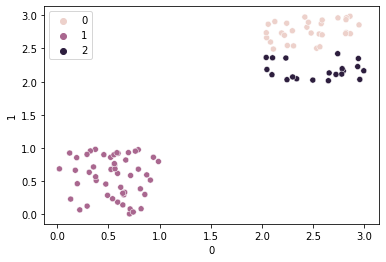

In [12]:
KMean= KMeans(n_clusters=3)
KMean.fit(Z)
label=KMean.predict(Z)
print(f'Silhouette Score(n=3): {silhouette_score(Z, label)}')
sns.scatterplot(Z[0],Z[1],hue=label)

In [19]:
#pca

%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'C:/Users/Ashwini Yadav/credit_card.csv')
df.head(200)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C10202,5588.846272,1.000000,3507.35,603.75,2903.60,0.000000,0.916667,0.166667,0.833333,0.000000,0,34,11500.0,1412.597253,1825.176503,0.000000,12
196,C10203,281.170378,0.818182,3163.69,56.80,3106.89,0.000000,0.750000,0.083333,0.666667,0.000000,0,36,8000.0,2422.911622,187.046284,0.888889,12
197,C10204,130.251538,0.909091,1343.19,1082.79,260.40,0.000000,1.000000,1.000000,0.583333,0.000000,0,33,15000.0,1043.559290,182.429461,0.545455,12
198,C10205,1973.814964,1.000000,873.00,873.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,5,8000.0,541.722532,762.682834,0.000000,12


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder()
columns = df.columns
#Let's Label Encode our class variable:
print(columns)
df['BALANCE'] = le.fit_transform(df['BALANCE'])
df.shape

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


(8950, 18)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   int64  
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [26]:
from sklearn.impute import SimpleImputer
newdf = df.copy()
X = newdf.iloc[:,0:19] #separting all numercial independent attribute
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe()


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'C10001'

In [27]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,4395.853073,2583.182363,0.000000,2158.250000,4395.500000,6632.750000,8870.00000
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


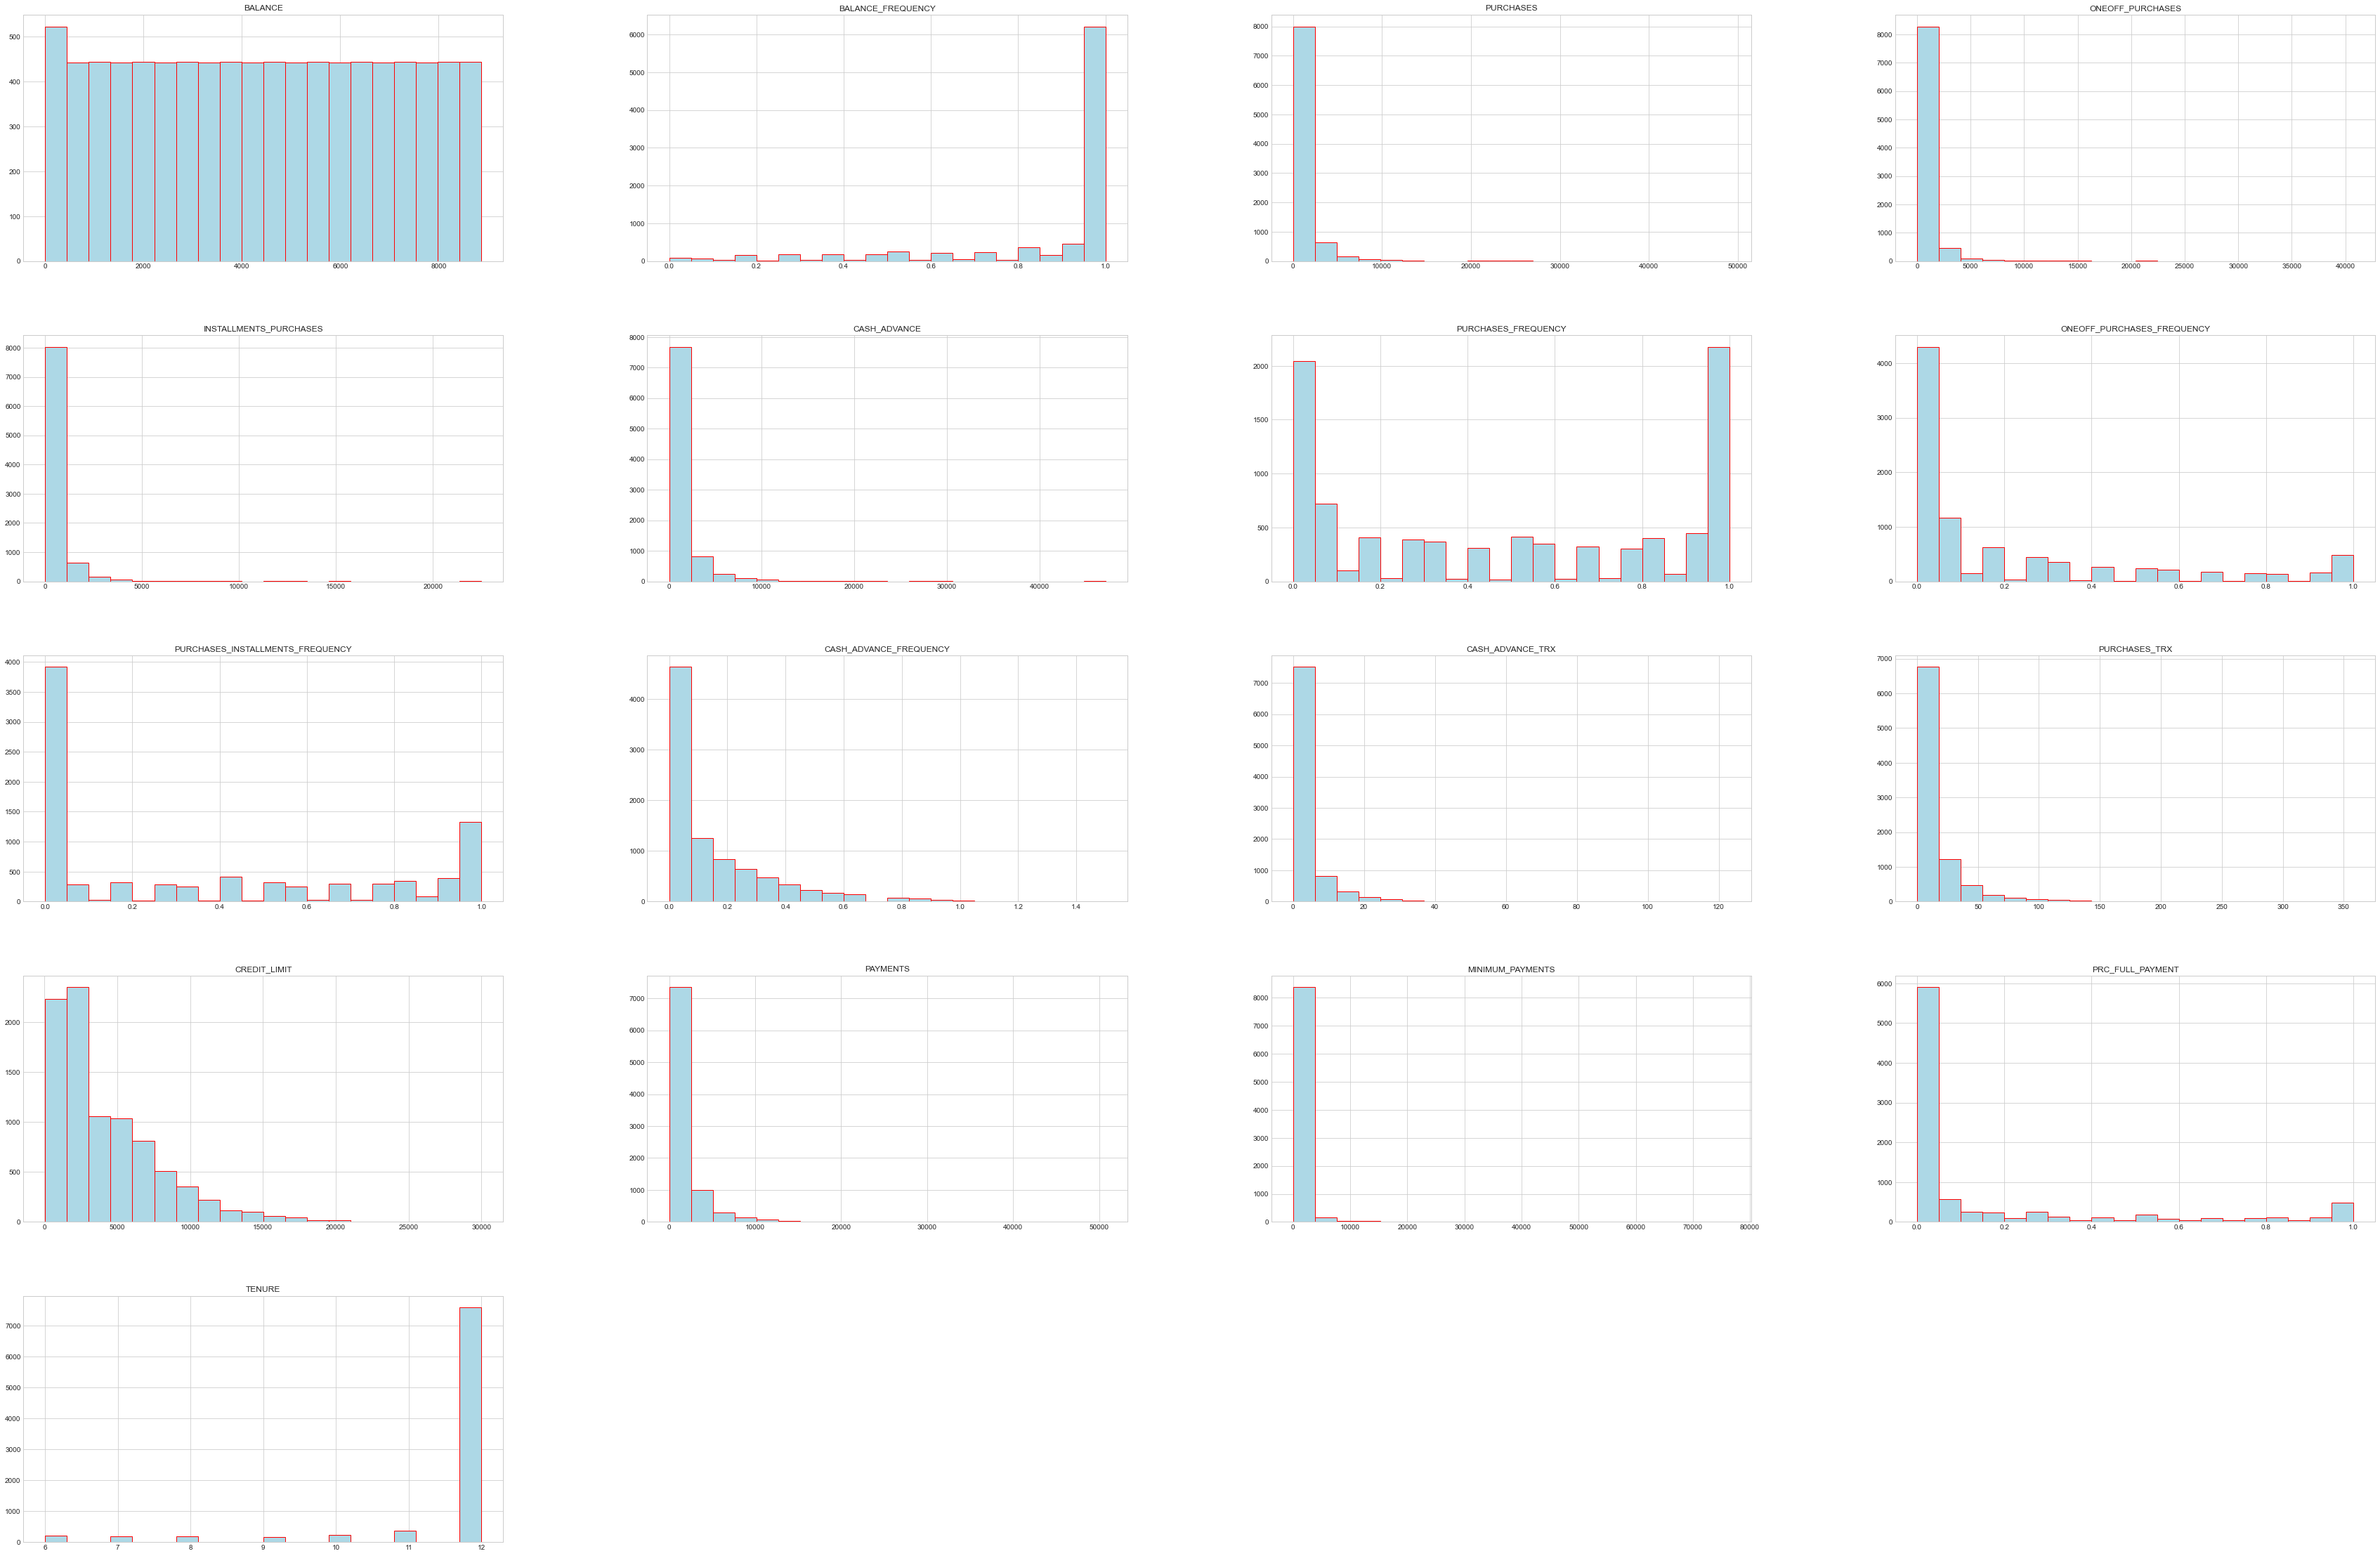

In [28]:
plt.style.use('seaborn-whitegrid')
newdf.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

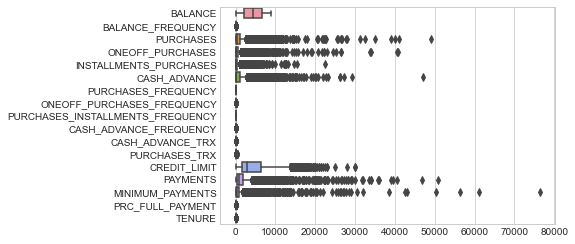

In [29]:
ax = sns.boxplot(data=newdf, orient="h")